In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()
import os

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, roc_curve, roc_auc_score

In [3]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Building the DataFrame

In [4]:
filename = os.path.join(os.getcwd(), "data", "adult.data")
df = pd.read_csv(filename)

In [5]:
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Problem Understanding

We need to get an understanding of the problem and what we need to do. For this, I will use the data to predict whether the income will be >50K or <=50K.

# Data Exploration and Preparation

### Inspect the Data

In [6]:
df.shape

(32560, 15)

In [7]:
list(df.columns)

['39',
 ' State-gov',
 ' 77516',
 ' Bachelors',
 ' 13',
 ' Never-married',
 ' Adm-clerical',
 ' Not-in-family',
 ' White',
 ' Male',
 ' 2174',
 ' 0',
 ' 40',
 ' United-States',
 ' <=50K']

### Define the Label

In [8]:
df[' <=50K']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name:  <=50K, Length: 32560, dtype: object

In [9]:
df.rename(columns = {' <=50K': 'Income'}, inplace = True)
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [11]:
# Checking Class Imbalance

class_counts = df['Income'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
Income
<=50K    24719
>50K      7841
Name: count, dtype: int64


### Remove Irrelevant Features

In [12]:
condition = (df.dtypes == 'int64') | (df.dtypes == 'float64')
num_col = list(df.dtypes[condition].index)
num_col

['39', ' 77516', ' 13', ' 2174', ' 0', ' 40']

In [13]:
df[num_col]

,39,77516,13,2174,0,40
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


After looking at the columns above, I determined they were not needed as features

In [14]:
df.drop(columns = num_col, inplace = True)
df

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


### Missing Data

In [15]:
df.isnull().sum()

 State-gov        0
 Bachelors        0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 United-States    0
Income            0
dtype: int64

### One Hot Encoding
*I took the long route in this section to practice my coding.\
I could have put all the non-numerical columns in the to_encode list and modified the column only if it had too many unique values.*

In [16]:
df.columns

Index([' State-gov', ' Bachelors', ' Never-married', ' Adm-clerical',
       ' Not-in-family', ' White', ' Male', ' United-States', 'Income'],
      dtype='object')

In [17]:
to_encode = []

##### Label

In [18]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [19]:
df['Income'] = np.where((df['Income'] == ' <=50K'), 0, 1)
df['Income'].unique()

array([0, 1])

##### State Gov Column

In [20]:
df[' State-gov'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [21]:
df.rename(columns = {' State-gov': 'Employed'}, inplace = True)

In [22]:
df.head(5)

,Employed,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,0


In [23]:
to_encode.append('Employed')

##### Bachelors Column

In [24]:
df[' Bachelors'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [25]:
df[' Bachelors'] = df[' Bachelors'].str.replace(' ', '')
df[' Bachelors'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [26]:
df.rename(columns = {' Bachelors': 'Bachelors'}, inplace = True)
to_encode.append('Bachelors')

##### Never Married Column

In [27]:
df[' Never-married'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [28]:
df[' Never-married'] = np.where((df[' Never-married'] == ' Divorced') | (df[' Never-married'] == ' Separated') | (df[' Never-married'] == ' Never-married') | (df[' Never-married'] == ' Widowed'), 'Never Married', 'Married')

In [29]:
df.rename(columns = {' Never-married': 'Married'}, inplace = True)
df.head(5)

,Employed,Bachelors,Married,Adm-clerical,Not-in-family,White,Male,United-States,Income
0,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,United-States,0
1,Private,HS-grad,Never Married,Handlers-cleaners,Not-in-family,White,Male,United-States,0
2,Private,11th,Married,Handlers-cleaners,Husband,Black,Male,United-States,0
3,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,Cuba,0
4,Private,Masters,Married,Exec-managerial,Wife,White,Female,United-States,0


In [30]:
to_encode.append('Married')

##### ADM Clerical Column

In [31]:
df[' Adm-clerical'].nunique()

15

In [32]:
df[' Adm-clerical'] = df[' Adm-clerical'].str.replace(' ', '')
df[' Adm-clerical'].unique()

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [33]:
df.rename(columns = {' Adm-clerical': 'ADM'}, inplace = True)
to_encode.append('ADM')

##### Not in Family Column

In [34]:
df[' Not-in-family'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [35]:
df[' Not-in-family'] = df[' Not-in-family'].str.replace(' ', '')
df[' Not-in-family'].unique()

array(['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [36]:
df.rename(columns = {' Not-in-family': 'Family'}, inplace = True)
to_encode.append('Family')

##### White Column

In [37]:
df[' White'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [38]:
df[' White'] = df[' White'].str.replace(' ', '')
df[' White'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [39]:
df.rename(columns = {' White': 'Race'}, inplace = True)
to_encode.append('Race')

##### Male Column

In [40]:
df[' Male'].unique()

array([' Male', ' Female'], dtype=object)

In [41]:
df[' Male'] = df[' Male'].str.replace(' ', '')
df[' Male'].unique()

array(['Male', 'Female'], dtype=object)

In [42]:
df.rename(columns = {' Male': 'Sex'}, inplace = True)

In [43]:
to_encode.append('Sex')

##### United States Column

In [44]:
df.rename(columns = {' United-States': 'US'}, inplace = True)

In [45]:
df['US'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [46]:
df['US'] = df['US'].str.replace(' ', '')

In [47]:
df['US'].nunique()

42

In [48]:
df.head(5)
to_encode.append('US')

##### Encoding

In [49]:
to_encode

['Employed', 'Bachelors', 'Married', 'ADM', 'Family', 'Race', 'Sex', 'US']

In [50]:
df = pd.get_dummies(df, columns = to_encode, dtype = 'int64')
print(df.columns)
df

Index(['Income', 'Employed_ ?', 'Employed_ Federal-gov', 'Employed_ Local-gov',
       'Employed_ Never-worked', 'Employed_ Private', 'Employed_ Self-emp-inc',
       'Employed_ Self-emp-not-inc', 'Employed_ State-gov',
       'Employed_ Without-pay', 'Bachelors_10th', 'Bachelors_11th',
       'Bachelors_12th', 'Bachelors_1st-4th', 'Bachelors_5th-6th',
       'Bachelors_7th-8th', 'Bachelors_9th', 'Bachelors_Assoc-acdm',
       'Bachelors_Assoc-voc', 'Bachelors_Bachelors', 'Bachelors_Doctorate',
       'Bachelors_HS-grad', 'Bachelors_Masters', 'Bachelors_Preschool',
       'Bachelors_Prof-school', 'Bachelors_Some-college', 'Married_Married',
       'Married_Never Married', 'ADM_?', 'ADM_Adm-clerical',
       'ADM_Armed-Forces', 'ADM_Craft-repair', 'ADM_Exec-managerial',
       'ADM_Farming-fishing', 'ADM_Handlers-cleaners', 'ADM_Machine-op-inspct',
       'ADM_Other-service', 'ADM_Priv-house-serv', 'ADM_Prof-specialty',
       'ADM_Protective-serv', 'ADM_Sales', 'ADM_Tech-support',
    

,Income,Employed_ ?,Employed_ Federal-gov,Employed_ Local-gov,Employed_ Never-worked,Employed_ Private,Employed_ Self-emp-inc,Employed_ Self-emp-not-inc,Employed_ State-gov,Employed_ Without-pay,...,US_Portugal,US_Puerto-Rico,US_Scotland,US_South,US_Taiwan,US_Thailand,US_Trinadad&Tobago,US_United-States,US_Vietnam,US_Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Modeling and Evaluation

### Train Test Val Split

In [51]:
df.head(5)

,Income,Employed_ ?,Employed_ Federal-gov,Employed_ Local-gov,Employed_ Never-worked,Employed_ Private,Employed_ Self-emp-inc,Employed_ Self-emp-not-inc,Employed_ State-gov,Employed_ Without-pay,...,US_Portugal,US_Puerto-Rico,US_Scotland,US_South,US_Taiwan,US_Thailand,US_Trinadad&Tobago,US_United-States,US_Vietnam,US_Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
y = df['Income']
X = df.drop(columns = 'Income')

In [53]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = .4, random_state = 123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = .5, random_state = 123)

### Model Selection

In [54]:
models = {'LR': LogisticRegression(max_iter = 1000),
          'DT': DecisionTreeClassifier(),
          'GBDT': GradientBoostingClassifier(),
          'RF': RandomForestClassifier()
         }

In [55]:
scoring_list = ['accuracy', 'f1_macro', 'roc_auc_ovr']

for score in scoring_list:
    print(f"-- Scoring: {score} -- \n")
    
    for model_name, model in models.items():
        cv_scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = score)
        print(f"Model: {model_name} \nAverage CV Score: {np.round(cv_scores.mean(), 2)} +/- {np.round(cv_scores.std(), 2)}\n")

-- Scoring: accuracy -- 

Model: LR 
Average CV Score: 0.83 +/- 0.01

Model: DT 
Average CV Score: 0.81 +/- 0.01

Model: GBDT 
Average CV Score: 0.83 +/- 0.01

Model: RF 
Average CV Score: 0.82 +/- 0.01

-- Scoring: f1_macro -- 

Model: LR 
Average CV Score: 0.75 +/- 0.01

Model: DT 
Average CV Score: 0.73 +/- 0.01

Model: GBDT 
Average CV Score: 0.74 +/- 0.01

Model: RF 
Average CV Score: 0.73 +/- 0.01

-- Scoring: roc_auc_ovr -- 

Model: LR 
Average CV Score: 0.88 +/- 0.01

Model: DT 
Average CV Score: 0.81 +/- 0.01

Model: GBDT 
Average CV Score: 0.88 +/- 0.01

Model: RF 
Average CV Score: 0.86 +/- 0.01



_I've decided to use both a logistic regression and gradient boosted tree model in a stacking ensemble._

### Base Models

##### Logistic Regression Model

In [56]:
# Grid Search

param_grid = {'C': [10**n for n in range(-5,5)]}
lr = LogisticRegression(max_iter = 1000)
lr_grid = GridSearchCV(lr, param_grid, cv = 5)
lr_grid_search = lr_grid.fit(X_train, y_train)
best_C = lr_grid_search.best_params_['C']

In [57]:
lr_model = LogisticRegression(max_iter = 1000, C = best_C)
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_val)
lr_proba = lr_model.predict_proba(X_val)[:, 1]

In [58]:
# Scores

lr_auc = roc_auc_score(y_val, lr_proba)
lr_f1 = f1_score(y_val, y_lr_pred)

print(f"AUC: {lr_auc} \nF1: {lr_f1}")

AUC: 0.8759358495839078 
F1: 0.5941176470588235


##### Gradient Boosted Tree

In [59]:
# Grid Search

param_grid = {'max_depth': [3, 6, 9, 12],
              'n_estimators': [5*n for n in range(5,25,5)]
             }
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid, cv = 5)
gbdt_grid_search = gbdt_grid.fit(X_train, y_train)
best_depth = gbdt_grid_search.best_params_['max_depth']
best_n_est = gbdt_grid_search.best_params_['n_estimators']

In [60]:
gbdt_model = GradientBoostingClassifier(max_depth = best_depth, n_estimators = best_n_est)
gbdt_model.fit(X_train, y_train)
y_gbdt_pred = gbdt_model.predict(X_val)
gbdt_proba = gbdt_model.predict_proba(X_val)[:, 1]

In [61]:
# Scores

gbdt_auc = roc_auc_score(y_val, gbdt_proba)
gbdt_f1 = f1_score(y_val, y_gbdt_pred)

print(f"AUC: {gbdt_auc} \nF1: {gbdt_f1}")

AUC: 0.8766413264804622 
F1: 0.5960982658959537


### Stack Ensemble

In [62]:
estimators = [("LR", lr_model),
              ("GBDT", gbdt_model)
             ]

In [63]:
stack_model = StackingClassifier(estimators = estimators, passthrough = False)
stack_model.fit(X_train, y_train)
y_stack_pred = stack_model.predict(X_val)
stack_proba = stack_model.predict_proba(X_val)[:, 1]

In [64]:
# Scores

stack_auc = roc_auc_score(y_val, stack_proba)
stack_f1 = f1_score(y_val, y_stack_pred)

print(f"AUC: {stack_auc} \nF1: {stack_f1}")

AUC: 0.8779851320824992 
F1: 0.593519882179676


Text(0, 0.5, 'True Positive Rate')

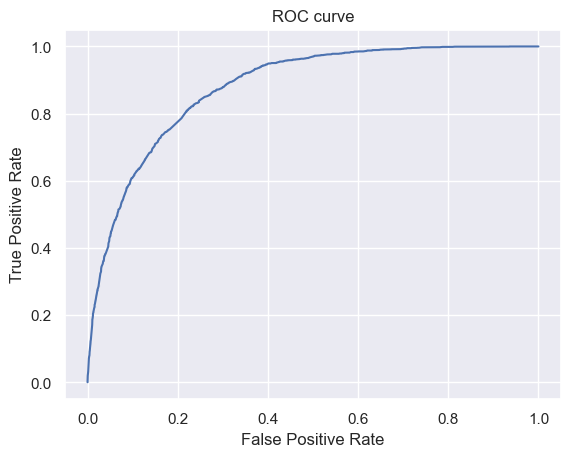

In [65]:
fpr, tpr, thresholds = roc_curve(y_val, stack_proba)

fig = plt.figure()
sns.lineplot(x = fpr, y = tpr)
plt.title("ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

### Changes for Improvement

In [66]:
# Handling Class Imbalance

class_counts = y_train.value_counts()
print("Class Distribution:")
print(class_counts)

smote = SMOTE(random_state = 123)
X_train, y_train = smote.fit_resample(X_train, y_train)

class_counts = y_train.value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
Income
0    14821
1     4715
Name: count, dtype: int64
Class Distribution:
Income
0    14821
1    14821
Name: count, dtype: int64


In [67]:
# Base Models and Stack

lr = LogisticRegression(max_iter = 1000, C = best_C)
lr.fit(X_train, y_train)

gbdt = GradientBoostingClassifier(max_depth = best_depth, n_estimators = best_n_est)
gbdt.fit(X_train, y_train)

estimators = [("LR", lr),
              ("GBDT", gbdt)
             ]

model = StackingClassifier(estimators = estimators, passthrough = False)
model.fit(X_train, y_train)
model_val_pred = model.predict(X_val)
model_val_proba = model.predict_proba(X_val)[:, 1]

In [68]:
# Comparison of scores before and after handling class imbalance

model_val_auc = roc_auc_score(y_val, model_val_proba)
model_val_f1 = f1_score(y_val, model_val_pred)

print(f"AUC 1: {stack_auc} \nAUC 2: {model_val_auc}")
print(f"F1 1: {stack_f1} \nF1 2: {model_val_f1}")

AUC 1: 0.8779851320824992 
AUC 2: 0.8766619824813802
F1 1: 0.593519882179676 
F1 2: 0.6437072676626994


Overall, the model does better after handling class imbalance. \
Let's see if feature selection helps improve performance even further. 

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

I didn't want to manually test a lot of values for the number of features, so I used a loop that would do the process for me.

In [70]:
# Feature Selection

auc_scores = [model_val_auc]
f1_scores = [model_val_f1]
num_features = [n for n in range(10, X.shape[1], 5)]

for n in num_features:
    selector = SelectKBest(f_classif, k = n)
    selector.fit(X, y)
    filter = selector.get_support()
    top_features = X.columns[filter]
    
    new_X_train = X_train[top_features]
    new_X_val = X_val[top_features]

    # Base Models and Stack

    lr2 = LogisticRegression(max_iter = 1000, C = best_C)
    lr2.fit(new_X_train, y_train)
    
    gbdt2 = GradientBoostingClassifier(max_depth = best_depth, n_estimators = best_n_est)
    gbdt2.fit(new_X_train, y_train)
    
    estimators = [("LR", lr),
                  ("GBDT", gbdt)
                 ]
    
    model2 = StackingClassifier(estimators = estimators, passthrough = False)
    model2.fit(new_X_train, y_train)
    
    model2_val_pred = model2.predict(new_X_val)
    model2_val_proba = model2.predict_proba(new_X_val)[:, 1]

    # Scores
    
    model2_val_auc = roc_auc_score(y_val, model2_val_proba)
    model2_val_f1 = f1_score(y_val, model2_val_pred)
    auc_scores.append(model2_val_auc)
    f1_scores.append(model2_val_f1)

In [71]:
# Table of the different scores with feature selection

index_label = []

for n in num_features:
    index = 'Num Features: ' + str(n)
    index_label.append(index)

scores_index = ['Revised Model'] + index_label

scores_display = pd.DataFrame({'AUC': auc_scores, 'F1': f1_scores}, index = scores_index )
scores_display

,AUC,F1
Revised Model,0.876662,0.643707
Num Features: 10,0.839196,0.583848
Num Features: 15,0.856440,0.598418
Num Features: 20,0.860238,0.600798
Num Features: 25,0.862803,0.608052
Num Features: 30,0.866711,0.620756
Num Features: 35,0.873850,0.632458
Num Features: 40,0.875134,0.634615
Num Features: 45,0.874903,0.637401
Num Features: 50,0.873961,0.632280


In [72]:
print(scores_display['AUC'].idxmax())
print(scores_display['F1'].idxmax())

Num Features: 90
Num Features: 90


I experimented with different amounts of features for the new model to have to see how the scores would change. As we can see above, having 90 features improved both AUC and F1 scores from the original revised model. Therefore, I will update the final model to have 90 features. 

In [75]:
selector = SelectKBest(f_classif, k = 90)
selector.fit(X, y)
filter = selector.get_support()
top_features = X.columns[filter]

X_train = X_train[top_features]
X_val = X_val[top_features]
X_test = X_test[top_features]

# Base Models and Stack

lr = LogisticRegression(max_iter = 1000, C = best_C)
lr.fit(X_train, y_train)

gbdt = GradientBoostingClassifier(max_depth = best_depth, n_estimators = best_n_est)
gbdt.fit(X_train, y_train)

estimators = [("LR", lr),
              ("GBDT", gbdt)
             ]

model = StackingClassifier(estimators = estimators, passthrough = False)
model.fit(X_train, y_train)

model_val_pred = model.predict(X_val)
model_val_proba = model.predict_proba(X_val)[:, 1]

# Scores

model_val_auc = roc_auc_score(y_val, model_val_proba)
model_val_f1 = f1_score(y_val, model_val_pred)
auc_scores.append(model_val_auc)
f1_scores.append(model_val_f1)

### Evaluation Using Test Set

In [76]:
model_test_pred = model.predict(X_test)
model_test_proba = model.predict_proba(X_test)[:, 1]
model_test_auc = roc_auc_score(y_test, model_test_proba)
model_test_f1 = f1_score(y_test, model_test_pred)

print(model_test_auc)
print(model_test_f1)

0.872256596653811
0.6472094214029698


Text(0, 0.5, 'Scores')

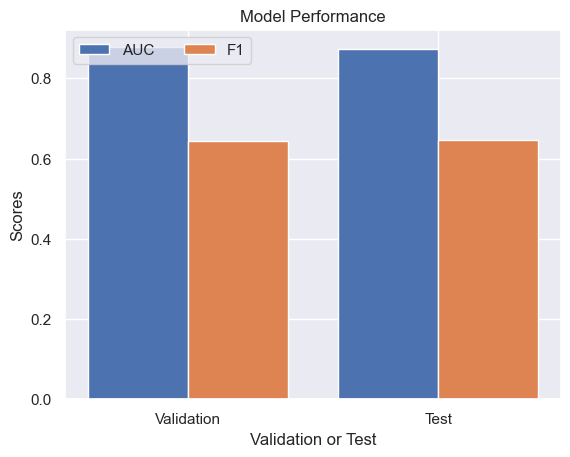

In [77]:
f1_scores = [model_val_f1, model_test_f1]
auc_scores = [model_val_auc, model_test_auc]

rg = np.arange(2)
width = .4

plt.bar(rg, auc_scores, width = width, label = 'Validation')
plt.bar(rg + width, f1_scores, width = width, label = 'Test')

labels = ['Validation', 'Test']
plt.xticks(rg + width/2, labels)

plt.title('Model Performance')
plt.legend(loc = 'upper left', ncol = 2, labels = ['AUC', 'F1'])

plt.xlabel("Validation or Test")
plt.ylabel("Scores")

In [78]:
scores_view = pd.DataFrame({'AUC': np.round(auc_scores, 3), 'F1': np.round(f1_scores, 3)}, index = ['Validation', 'Test'])

scores_view

,AUC,F1
Validation,0.877,0.645
Test,0.872,0.647


The AUC and F1 scores are very similar indicating that there is no overfitting. \
The scores show good performance indicating that there is no underfitting.

In [79]:
c_m = confusion_matrix(y_test, model_test_pred, labels = [True, False])

# Confusion matrix in a table
pd.DataFrame(c_m,
columns = ['Predicted: >50K', 'Predicted: <=50K'],
index = ['Actual: >50K', 'Actual: <=50K']
)

,Predicted: >50K,Predicted: <=50K
Actual: >50K,1264,303
Actual: <=50K,1075,3870


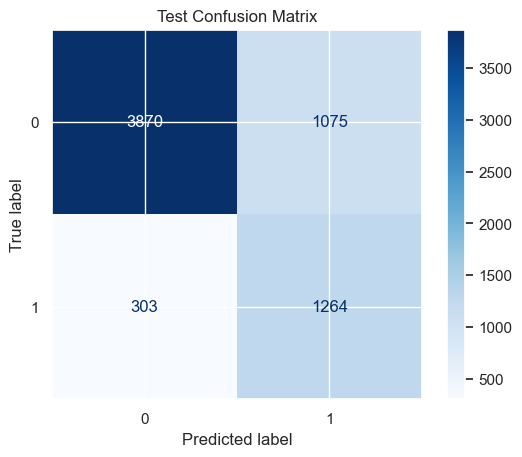

In [80]:
cm = confusion_matrix(y_test, model_test_pred, labels = model.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot(cmap = 'Blues')
plt.title('Test Confusion Matrix')
plt.show()

### Making the Model Persistent

In [81]:
import pickle

In [82]:
# Saving the model

pkl_model_filename = "Binary_Classification_Model.pkl"  
pickle.dump(model, open(pkl_model_filename, 'wb'))

In [83]:
# Loading the model back from the file

persistent_model = pickle.load(open(pkl_model_filename, 'rb'))
persistent_model

StackingClassifier(estimators=[('LR', LogisticRegression(C=0.1, max_iter=1000)),
                               ('GBDT',
                                GradientBoostingClassifier(max_depth=6))])

In [84]:
# Test the model is ready for use by making predictions

persistent_model = pickle.load(open(pkl_model_filename, 'rb'))
persistent_model

StackingClassifier(estimators=[('LR', LogisticRegression(C=0.1, max_iter=1000)),
                               ('GBDT',
                                GradientBoostingClassifier(max_depth=6))])